<a href="https://colab.research.google.com/github/salemhamdani/SparksTasks/blob/main/Task_1_sparks_foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# TASK1:Prediction using supervised Machine learning**
Presented by *Salem Hamdani* ✒


**GOAL** : Predict the percentage of an student based on the no. of study hours

**Simple Linear Regression** : This is a simple linear regression task as it involves just two variables.

We will predict the percentage of marks that a student would score based on the hours he studied. 

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. 

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:

data.shape

(25, 2)

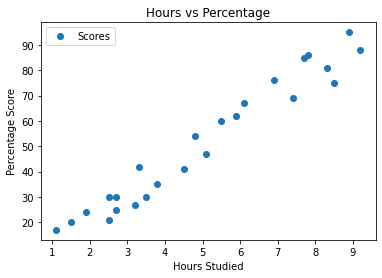

In [8]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

*** Data pre-processing and preparing :***

 Divide the data into "attributes" (inputs) and "labels" (outputs).

In [20]:
X = data.iloc[:, :-1].values  
#print(X)
X


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
Y = data.iloc[:, 1].values 
#print(Y)
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

# **Training the algorithm : **

After splitting the data now we will train it.

In [21]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


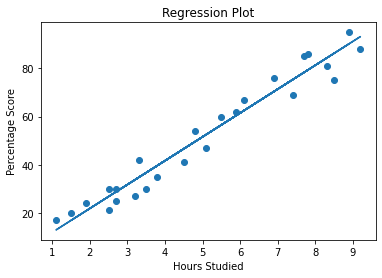

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [24]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title('Regression Plot')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.scatter(X,y)
plt.plot(X, line);
plt.show()
print(data.corr())


# **Making Predictions:**
Now that we have trained our algorithm, it's time to make some predictions.

In [25]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# **Comparing Actual vs Predicted**

In [27]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted':Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **Model evaluation:**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [28]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002982


**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [31]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


# According to our regression model a person who studied for 9.25hours per day will likely score 93.692